In [19]:
import numpy as np
import pandas as pd


In [20]:
game_data = pd.read_csv('Game_Data3.csv')
game_data.head()

,year,week,hometeam,awayteam,homescore,awayscore,pointdiff,hwhl,covered,homeline,...,home_defrushdvoa,home_stdvoa,visit_totaldvoa,visit_offensedvoa,visit_offpassdvoa,visit_offrushdvoa,visit_defensedvoa,visit_defpassdvoa,visit_defrushdvoa,visit_stdvoa
0,2015,1,DEN,BAL,19,13,6,1,1,-4.5,...,-0.207,0.051,0.011,-0.310,-0.532,-0.092,-0.268,-0.282,-0.248,0.053
1,2015,1,JAC,CAR,9,20,-11,0,0,3.0,...,-0.440,-0.159,-0.094,-0.285,-0.261,-0.304,-0.304,-0.501,0.073,-0.113
2,2015,1,OAK,CIN,13,33,-20,0,0,3.5,...,-0.002,0.007,0.623,0.436,0.837,0.099,-0.246,-0.151,-0.496,-0.060
3,2015,1,NYJ,CLE,31,10,21,1,1,-3.0,...,-0.417,-0.023,-0.490,-0.254,-0.111,-0.176,0.238,0.316,0.182,0.002
4,2015,1,SD,DET,33,28,5,1,1,-3.0,...,-0.184,-0.115,-0.285,-0.197,-0.100,-0.373,0.136,0.230,0.005,0.047


In [21]:
X = game_data[['homeline', 'predicttotal', 'home_offpassdvoa', 'home_offrushdvoa', 'home_defpassdvoa', 'home_defrushdvoa', 'home_stdvoa', 'visit_offpassdvoa', 'visit_offrushdvoa', 'visit_defpassdvoa', 'visit_defrushdvoa', 'visit_stdvoa' ]]
y = game_data['pointdiff']
print(X.shape, y.shape)


(1111, 12) (1111,)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)
model.fit(X_train, y_train)


MSE = mean_squared_error(y_train, model.predict(X_train))
r2 = model.score(X_train, y_train)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 45.766355461829185, R2: 0.769972521632835


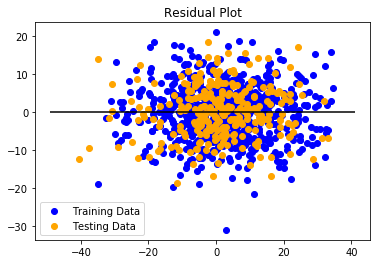

In [24]:
import matplotlib.pyplot as plt
    
predictions = model.predict(X_test)

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model2 = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid2 = GridSearchCV(model2,parameters, verbose=3, cv=3, scoring='r2')


In [26]:
grid2.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.758980552697556, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.7371611227549963, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.7773953990081165, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.7589805526975556, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.7371611227549965, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=3)

In [27]:
print ("r2 / variance : ", grid2.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid2.predict(X) -y) ** 2))

r2 / variance :  0.7578467129641272
Residual sum of squares: 45.93


In [29]:
from sklearn.externals import joblib
joblib.dump(grid2, 'John_Madden.joblib') 

['John_Madden.joblib']

In [30]:
print(grid2.best_params_)
print(grid2.best_score_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.7578467129641272


In [31]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
model2 = SVC(kernel='linear')
param_grid = {'C': [ 0.001, 0.01, 0.1, 1],
              'gamma': [ 0.00001,0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(model2, param_grid, verbose=3, cv=3, scoring = 'r2')

In [32]:
grid.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] . C=0.001, gamma=1e-05, score=-0.00778016977272511, total=   0.0s
[CV] C=0.001, gamma=1e-05 ............................................


C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, gamma=1e-05, score=-0.006598865237787743, total=   0.0s
[CV] C=0.001, gamma=1e-05 ............................................
[CV]  C=0.001, gamma=1e-05, score=-0.006215941463982633, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.001, gamma=0.0001, score=-0.00778016977272511, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV]  C=0.001, gamma=0.0001, score=-0.006598865237787743, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV]  C=0.001, gamma=0.0001, score=-0.006215941463982633, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.00778016977272511, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV]  C=0.001, gamma=0.001, score=-0.006598865237787743, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV]  C=0.001, gamma=0.001, score=-0.006215941463982633, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.00778016977272511, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV]

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   21.7s finished
C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=3)

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 1e-05}
0.5066936721755607


In [34]:
from sklearn.externals import joblib
joblib.dump(grid, 'Pro_Set.joblib') 

['Pro_Set.joblib']

In [35]:
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X) -y) ** 2))

r2 / variance :  0.5066936721755607
Residual sum of squares: 69.69
